# IMPORT LIBRARY & LOAD DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)


In [3]:
advert = pd.read_csv("Advertising.csv")
advert.head(10)
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
print(advert)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


# EDA (Exploratory Data Analysis)

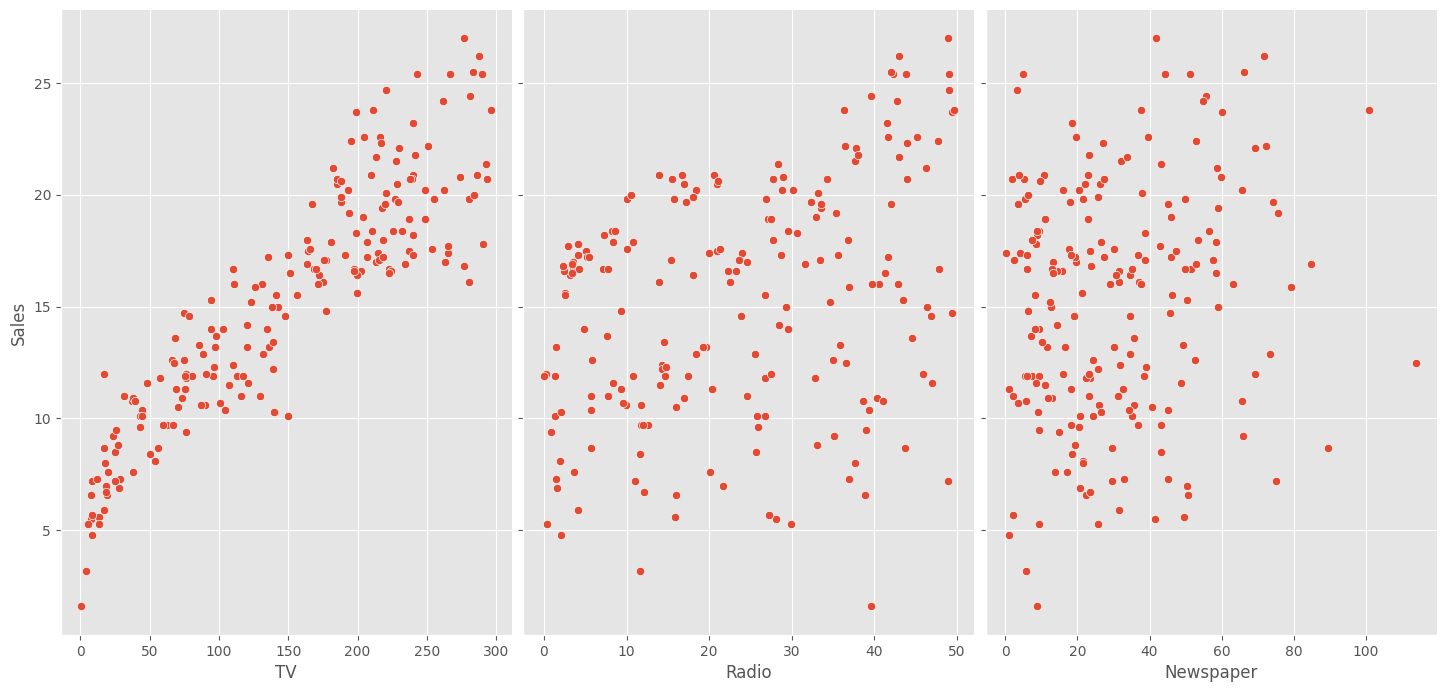

In [10]:
# Checking correlation between features and Response
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'],
             y_vars='Sales', height=7, aspect=0.7)



1.   TV Memiliki korelasi yang linear dengan sales -> bagus
2.   Radio korelasi tersebar -> kurang
3.   Newspaper korelasi tersebar dominan kiri -> kurang, lebih kecil



<Axes: >

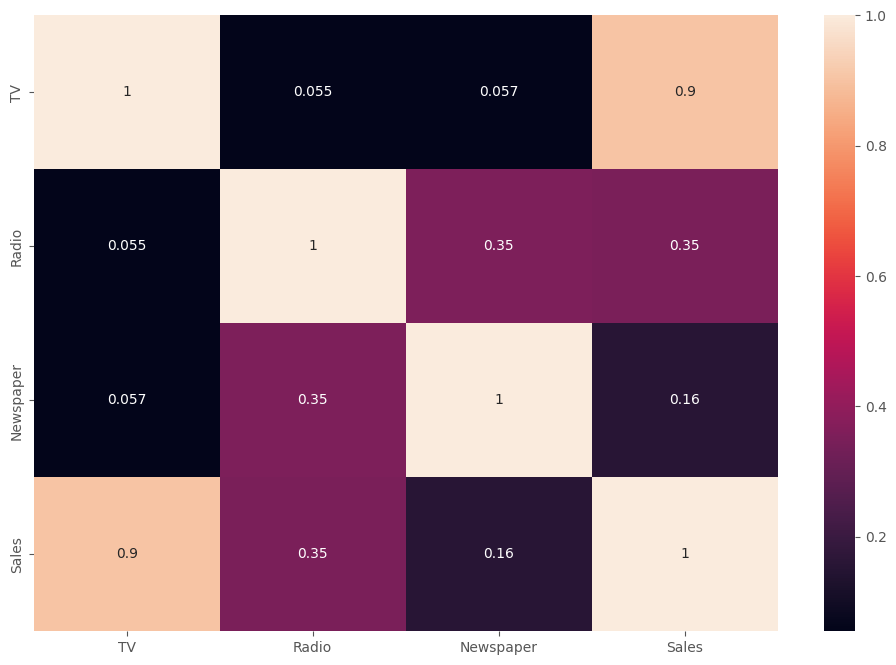

In [12]:
sns.heatmap(advert.corr(), annot=True)

Newspaper memiliki korelasi paling rendah diantara ketiga Features
<br>
<br>
Urutan korelasi: <br>
TV - Radio - Newspaper

# FEATURE SELECTION Using Adjusted R2 Squared

In [18]:
# Checking R_squared between 'TV', 'Radio', 'Newspaper'
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = advert[['TV', 'Radio', 'Newspaper']]
y = advert['Sales']

Menyesuaikan model regresi linear dengan dataset. Hanya gunakan fitur TV dan Newspaper dan kita train dan eval seluruh kumpulan data. Tujuannya di sini adalah untuk lihat skor r2

In [22]:
# We are training and evaluate on the entire dataset with TV and Newspaper Features
X = advert[['TV', 'Newspaper']]
y = advert['Sales']
lm1 = LinearRegression()
lm1.fit(X,y)
lm1_pred = lm1.predict(X)

r_squared = r2_score(y, lm1_pred)
adjusted_r_squared = 1 - (1-r_squared*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Adjusted R^2: ', adjusted_r_squared)

Adjusted R^2:  0.8320037750351266


In [23]:
# We are training and evaluate on the entire dataset with TV and Radio Features
X = advert[['TV', 'Radio']]
y = advert['Sales']
lm2 = LinearRegression()
lm2.fit(X,y)
lm2_pred = lm2.predict(X)

r_squared = r2_score(y, lm2_pred)
adjusted_r_squared = 1 - (1-r_squared*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Adjusted R^2: ', adjusted_r_squared)

Adjusted R^2:  0.9117529649899222


In [24]:
# We are training and evaluate on the entire dataset with TV, Newspaper, and Radio Features
X = advert[['TV', 'Radio', 'Newspaper']]
y = advert['Sales']
lm3 = LinearRegression()
lm3.fit(X,y)
lm3_pred = lm3.predict(X)

r_squared = r2_score(y, lm3_pred)
adjusted_r_squared = 1 - (1-r_squared*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Adjusted R^2: ', adjusted_r_squared)

Adjusted R^2:  0.9164064627740955


Dapat disimpulkan bahwa: <br>
<br>
1. Fitur Koran memiliki kontribusi yang tidak besar
2. Kita bisa drop fitur Koran guna menjaga efektivitas model

# MODEL EVALUATION

Tak hanya ukur akurasi tapi juga ukur nilai eror (kali ini dengan RMSE)

In [27]:
# Model Evaluation using trin test and Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Menggunakan fitur TV, Radio, dan Koran
X = advert[['TV', 'Radio', 'Newspaper']]
y = advert['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
lm4 = LinearRegression()
lm4.fit(X_train,y_train)
lm4_pred = lm4.predict(X_test)

print('MSE: ', np.sqrt(mean_squared_error(y_test, lm4_pred)))
print('Adjusted R^2: ', 1 - (1-r2_score(y_test, lm4_pred))*(len(y)-1)/(len(y)-X.shape[1]-1))

MSE:  1.5096109295725835
Adjusted R^2:  0.903435985219885


In [28]:
# Menggunakan fitur TV, Radio
X = advert[['TV', 'Radio']]
y = advert['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
lm5 = LinearRegression()
lm5.fit(X_train,y_train)
lm5_pred = lm5.predict(X_test)

print('MSE: ', np.sqrt(mean_squared_error(y_test, lm5_pred)))
print('Adjusted R^2: ', 1 - (1-r2_score(y_test, lm5_pred))*(len(y)-1)/(len(y)-X.shape[1]-1))

MSE:  1.509248161866739
Adjusted R^2:  0.9039723264679693


In [30]:
# Menggunakan fitur TV, Koran
X = advert[['TV', 'Newspaper']]
y = advert['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
lm6 = LinearRegression()
lm6.fit(X_train,y_train)
lm6_pred = lm6.predict(X_test)

print('MSE: ', np.sqrt(mean_squared_error(y_test, lm6_pred)))
print('Adjusted R^2: ', 1 - (1-r2_score(y_test, lm6_pred))*(len(y)-1)/(len(y)-X.shape[1]-1))

MSE:  2.272939941620692
Adjusted R^2:  0.7822034395067341


Dapat disimpulkan: <br>

1. RMSE ketiga fitur 1.5
   dengan Adjusted R2 90%
<br>
2. RMSE TV dan Radio 1.5
   dengan Adjusted R2 90%
<br>
3. RMSE TV dan Newspaper 2.27
   dengan Adjusted R2 78%

<br>

*Dapat Disimpulkan bahwa Fitur TV dan Radio adalah yang paling maksimal dan pengaruhnya besar terhadap nilai skalar yang dicari*